In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

# 1D Gaussian model (non-sep) vs. 2D Gaussian model (sep)

In [2]:
datapath = '../../DataTables/Separability.csv'
params = pd.read_csv(datapath)

In [3]:
params_mean = params.groupby(['group', 'model']).mean()
params_sem = params.groupby(['group', 'model']).sem()
params_mean

crosscorr
group model             
EB    non-sep   0.017150
      sep       0.025085
SC    non-sep   0.005673
      sep       0.008864

In [4]:
print(sns.color_palette("Paired").as_hex())

['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']


In [5]:
colorpalette1=['#b2df8a', '#33a02c']
colorpalette2=['#cab2d6', '#6a3d9a']

In [6]:
paramsEB = params[params['group']=='EB']
paramsSC = params[params['group']=='SC']

# Surface Model 

In [7]:
datapath2 = '../../DataTables/Separability_params.csv'
params2 = pd.read_csv(datapath2)

In [8]:
params2_mean = params2.groupby(['group']).mean()
params2_sem = params2.groupby(['group']).sem()
params2_sem

,ST-amp,ST-center,ST-width,ST-err,ST-crosscorr,1DG-amp,1DG-ang,1DG-width,1DG-err,1DG-crosscorr,Surf-sf,Surf-amp,Surf-a,Surf-err,Surf2-sf,Surf2-amp,Surf2-a,Surf2-err
group,,,,,,,,,,,,,,,,,,
EB,0.005688,0.09998,0.035212,0.000975,0.003772,0.001546,0.012590,0.015284,0.001265,0.003063,0.038844,0.009287,0.019416,0.000946,0.038819,0.009282,0.040964,0.000971
SC,0.002816,0.05077,0.063399,0.001817,0.002955,0.001774,0.034809,0.020521,0.002536,0.002039,0.036868,0.013986,0.010968,0.001792,0.040120,0.014191,0.100976,0.001757


In [9]:
print(sns.color_palette("deep").as_hex())

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


In [10]:
colorpalette=['#55a868','#8172b3']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


<Figure size 432x288 with 0 Axes>

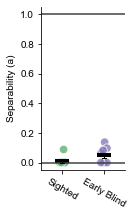

In [11]:
plt.figure(2)
plt.figure(figsize=(1.5,3))
plt.rcParams['font.family'] = "Arial"

plt.axhline(y=0, color=".25")
plt.axhline(y=1, color=".25")
sns.stripplot(x="group", y='Surf-a', data=params2, order=["SC","EB"], alpha=.75, palette=colorpalette,
             edgecolor='white', linewidth=1, size=8.5, marker='o', zorder=1)
sns.pointplot(x="group", y="Surf-a", data=params2, order=["SC","EB"], join=False, color="0", ci=68, 
             scale=2, markers='_', errwidth=1, capsize=0.1)

plt.ylabel('Separability (a)', fontsize=10);
plt.xlabel('');
plt.xticks([0, 1], ['Sighted', 'Early Blind'], fontsize=10, rotation=-30)

sns.despine()


# Surface Model Stats

In [12]:
params2EB=params2[params2["group"]=="EB"]
params2SC=params2[params2["group"]=="SC"]

In [13]:
pg.ttest(x=params2EB['Surf2-a'], y=0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.142597,7,two-sided,0.890626,"[-0.09, 0.1]",0.050416,0.339,0.05177


In [14]:
pg.ttest(x=params2SC['Surf2-a'], y=0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.823589,7,two-sided,0.110983,"[-0.42, 0.05]",0.644736,1.062,0.350868


In [15]:
pg.ttest(x=params2EB['Surf2-a'], y=params2SC['Surf2-a'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.743437,14,two-sided,0.103166,"[-0.04, 0.42]",0.871719,1.122,0.3687


In [16]:
pg.wilcoxon(x=params2EB['Surf-a'], correction=True)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.007812,1.0,NaN


In [17]:
pg.wilcoxon(x=params2SC['Surf-a'], correction=True)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.007812,1.0,NaN


In [18]:
pg.mwu(x=params2EB['Surf-a'], y=params2SC['Surf-a'])

,U-val,alternative,p-val,RBC,CLES
MWU,40.0,two-sided,0.441803,-0.25,0.625


# Separable (a = 0) vs Non-separable (a = 1) 

In [19]:
datapath3 = '../../DataTables/ModelComparison.csv'
params3 = pd.read_csv(datapath3)

In [20]:
params3_mean = params3.groupby(['group', 'model']).mean()
params3_sem = params3.groupby(['group', 'model']).sem()

In [21]:
colorpalette1=['#b2df8a', '#33a02c']
colorpalette2=['#cab2d6', '#6a3d9a']

In [22]:
params3EB = params3[params3['group']=='EB']
params3SC = params3[params3['group']=='SC']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


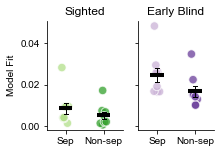

In [23]:
f, axs = plt.subplots(1,2,sharey=True)
f.set_size_inches(3, 2)
sns.stripplot(x="model", y="crosscorr", data=params3SC, ax=axs[0], 
              palette=colorpalette1, alpha=.75, zorder=1, edgecolor='white', linewidth=1, size=8.5, marker='o')
sns.stripplot(x="model", y="crosscorr", data=params3EB, ax=axs[1], 
              palette=colorpalette2, alpha=.75, zorder=1, edgecolor='white', linewidth=1, size=8.5, marker='o')
sns.pointplot(x="model", y="crosscorr", data=params3SC, color="0", scale=2, markers='_',
              errwidth=1, capsize=0.1, join=False, ci=68, ax=axs[0])
sns.pointplot(x="model", y="crosscorr", data=params3EB, color="0", scale=2, markers='_',
              errwidth=1, capsize=0.1, join=False, ci=68, ax=axs[1])

plt.subplot(1,2,1)
plt.xticks([0, 1], ['Sep', 'Non-sep'])
plt.xlabel('');
plt.ylabel('Model Fit');
plt.title('Sighted')

plt.subplot(1,2,2)
plt.ylabel('');
plt.xlabel('');
plt.xticks([0, 1], ['Sep', 'Non-sep'])
plt.title('Early Blind')

sns.despine()

# Sep vs Non-sep Stats

In [24]:
pg.mixed_anova(dv='crosscorr', within='model', between='group', subject='sub', data=params3)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,0.001537,1,14,0.001537,11.237115,0.004743,0.445261,NaN
1,model,0.000260,1,14,0.000260,46.597846,0.000008,0.768969,1.0
2,Interaction,0.000042,1,14,0.000042,7.566231,0.015624,0.350837,NaN


In [25]:
pg.pairwise_tests(dv='crosscorr', between='group', within='model', subject='sub', data=params3, 
                  padjust='holm', within_first=False)

,Contrast,group,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,-,EB,SC,False,True,3.352181,14.0,two-sided,0.004743,NaN,NaN,8.951,1.584667
1,model,-,non-sep,sep,True,True,-5.693003,15.0,two-sided,0.000043,NaN,NaN,606.59,-0.509044
2,group * model,EB,non-sep,sep,True,True,-6.610354,7.0,two-sided,0.000301,0.000603,holm,110.002,-0.790787
3,group * model,SC,non-sep,sep,True,True,-2.955930,7.0,two-sided,0.021227,0.021227,holm,3.637,-0.450429


In [26]:
datapath4 = '../../DataTables/ModelDiff.csv'
params4 = pd.read_csv(datapath4)
params4.head()

,sub,group,diff
0,'EB_G_PPE_1959',EB,0.003529
1,'EB_G_XF_1987',EB,0.006384
2,'EB_G_KK_1979',EB,0.011024
3,'EB_L_TA_1956',EB,0.006713
4,'EB_G_YZ_1949',EB,0.010769


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


<Figure size 432x288 with 0 Axes>

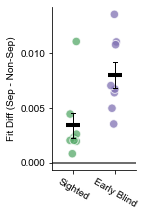

In [27]:
plt.figure(4)
plt.figure(figsize=(1.5,3))
plt.rcParams['font.family'] = "Arial"

sns.stripplot(x="group", y="diff", data=params4, order=['SC','EB'],
              palette=colorpalette, alpha=.75, zorder=1, edgecolor='white', linewidth=1, size=8.5, marker='o')
sns.pointplot(x="group", y="diff", data=params4, color="0", order=['SC','EB'], scale=2, markers='_',
              errwidth=1, capsize=0.1, join=False, ci=68)
plt.axhline(y=0, color=".25")

plt.xticks([0, 1], ['Sighted', 'Early Blind'], fontsize=10, rotation=-30)
plt.xlabel('');
plt.yticks([0, 0.005, 0.01])
plt.ylabel('Fit Diff (Sep - Non-Sep)');

sns.despine()